In [1]:
# Scratch work.

import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from scipy.stats import skew, kurtosis, norm, mode
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.preprocessing import quantile_transform
import psutil
import shutil
import os
%matplotlib inline

In [5]:
def preprocess(data):

    freqs = data[:,0]
    drifts = data[:,1]
    snrs = data[:,2]
    skews = data[:,3]
    kurts = data[:,4]
    sarles = data[:,5]
    corrs = data[:,6]
    tbws = data[:,7]
    tskews = data[:,8]
    tstds = data[:,9]
    fstds = data[:,10]
    sigbws = data[:,11]

    normal_drifts = quantile_transform(drifts.reshape(len(drifts), 1), n_quantiles=100000, 
                                   output_distribution='normal', subsample=100000)
    normal_drifts = normal_drifts.reshape(len(normal_drifts))

    data_arr = np.array([np.argsort(np.argsort(freqs))/len(freqs),
                        #0.1*(freqs-np.min(freqs))/np.max(freqs-np.min(freqs)), 
                        np.abs(normal_drifts)/np.max(np.abs(normal_drifts)), 
                        (np.log10(snrs)-np.min(np.log10(snrs)))/np.max(np.log10(snrs)-np.min(np.log10(snrs))), 
                        (skews-np.min(skews))/np.max((skews-np.min(skews))), 
                        (np.log10(kurts)-np.min(np.log10(kurts)))/np.max(np.log10(kurts)-np.min(np.log10(kurts))), 
                        sarles, 
                        corrs, 
                        (np.log10(tbws*1e6)-np.min(np.log10(tbws*1e6)))/np.max(np.log10(tbws*1e6)-np.min(np.log10(tbws*1e6))),
                        (tskews-np.min(tskews))/np.max((tskews-np.min(tskews))),
                        (np.log10(tstds)-np.min(np.log10(tstds))),
                        (np.log10(fstds)-np.min(np.log10(fstds))),
                        sigbws/np.max(sigbws)
                        ])  ### PRE-PROCESSED FOR HDBSCAN

    data_arr_unscaled = np.array([freqs, 
                        drifts, 
                        snrs, 
                        skews, 
                        kurts, 
                        sarles, 
                        corrs, 
                        tbws*1e6, # units of Hz
                        tskews,
                        tstds,
                        fstds,
                        sigbws*1e6 # units of Hz
                        ])

    return np.transpose(data_arr), np.transpose(data_arr_unscaled)

In [4]:
unique_params = np.load('/datax/scratch/benjb/C23_L_unique_param_array.npy')

In [6]:
unique_params, _ = preprocess(unique_params)

In [7]:
ccc = np.load('/datax/scratch/benjb/C23_L_non_anom_centroids.npy', allow_pickle=True)

In [8]:
cci = np.load('/datax/scratch/benjb/C23_L_non_anom_centroid_idxs.npy', allow_pickle=True)

In [9]:
ccc_0 = unique_params[cci]

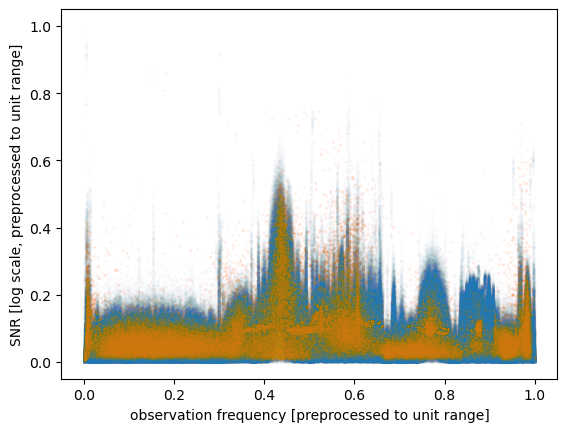

In [22]:
import matplotlib.pyplot as plt

plt.scatter(ccc_0[:,0], ccc_0[:,2], s=3, lw=0, alpha=0.01)
plt.scatter(ccc[:,0], ccc[:,2], s=3, lw=0, alpha=0.02)
plt.xlabel('observation frequency [preprocessed to unit range]')
plt.ylabel('SNR [log scale, preprocessed to unit range]')
plt.savefig('/datax/scratch/benjb/C23_L_plot_centroid_comparison.png', bbox_inches='tight')
plt.show()